In [19]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load the dataset
X_train = pd.read_csv("data/X_train.csv")
y_train = pd.read_csv("data/y_train.csv").squeeze()

In [2]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.617940,-0.391980,0.13278,0.032551,0.55201,0.83393,-0.837550,-0.874060,0.43930,0.268260,...,-0.45454,0.36452,1.575300,-0.620320,-0.25371,-0.447750,-0.038273,-0.019938,-0.195500,0.428830
1,0.333860,-1.549100,1.67050,0.793560,0.80251,-0.07206,-0.068276,3.302400,0.52045,0.685720,...,-0.36913,1.74080,1.286600,-0.013396,-1.53930,0.833540,0.472610,0.513030,-0.743140,1.219900
2,0.040399,-0.608070,1.62080,-0.355970,0.12105,1.35250,0.373200,1.111700,0.35894,-0.344100,...,-1.40230,-0.24763,0.507050,0.708220,-0.60083,0.911040,0.009979,-0.475990,-0.094731,-0.008521
3,1.723600,0.195290,1.03880,-3.009100,-0.33222,0.91067,0.666690,0.717250,3.05850,1.489900,...,-1.21540,-0.25284,-1.307800,-0.445660,0.27918,0.264670,-0.149360,1.492900,-1.176700,-1.854500
4,-1.032300,1.900100,-1.46010,0.383710,-0.51039,0.74481,-0.914660,-0.865880,-0.34426,0.869650,...,1.32230,0.06020,-1.079000,-0.617050,1.18450,-0.210630,-0.105870,-0.412040,1.409700,0.133350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.821000,-0.016804,0.36978,-1.652500,1.32370,-0.67655,-1.238000,-0.764210,0.16283,-0.240030,...,-1.25470,-0.76602,1.453600,1.954500,0.47550,-1.824700,-0.227030,1.879700,-1.123800,1.309600
9996,-0.636390,-0.403470,0.81521,-0.665990,-2.16210,2.03190,0.278910,0.169180,0.52821,-0.217570,...,0.42273,-0.07438,-0.958710,-0.030666,-0.43114,0.075285,-0.892370,-0.677320,-1.330200,-0.809090
9997,0.773410,0.157330,-0.82969,-2.569100,1.33060,-0.45354,0.154800,0.010011,0.79613,0.606680,...,-1.15410,-1.75520,-1.645100,0.316050,-0.49966,0.997910,-1.389800,0.773250,0.049626,-0.500440
9998,-0.382970,1.011900,-2.12320,1.385600,0.30195,-0.45940,-0.050270,0.591280,1.49210,0.012371,...,0.24839,0.20263,0.010861,-0.775840,-0.98314,0.216800,1.323800,0.450360,1.586200,-0.289050


In [3]:
y_train

0       10
1        5
2        5
3        5
4        5
        ..
9995    19
9996     5
9997    17
9998    24
9999     5
Name: label, Length: 10000, dtype: int64

In [4]:
class_counts = y_train.value_counts()

class_counts

label
5     4479
10    1081
6      553
8      516
12     457
24     385
17     354
26     278
21     269
14     264
4      238
25     184
19     177
20     153
27     107
7      103
11      78
3       65
13      62
18      60
23      41
15      26
9       25
0       18
2        7
22       7
1        7
16       6
Name: count, dtype: int64

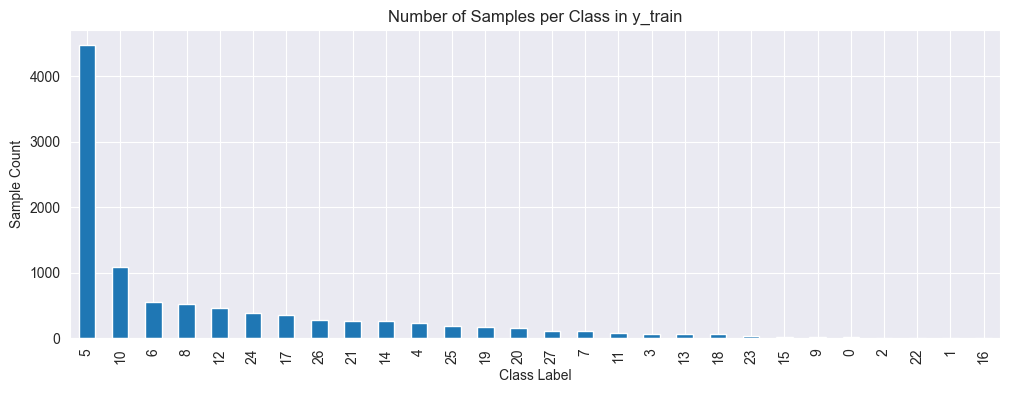

In [14]:
plt.figure(figsize=(12,4))
class_counts.plot(kind='bar')
plt.title("Number of Samples per Class in y_train")
plt.xlabel("Class Label")
plt.ylabel("Sample Count")
plt.show()

In [15]:
X_train.isnull().sum().sum()

0

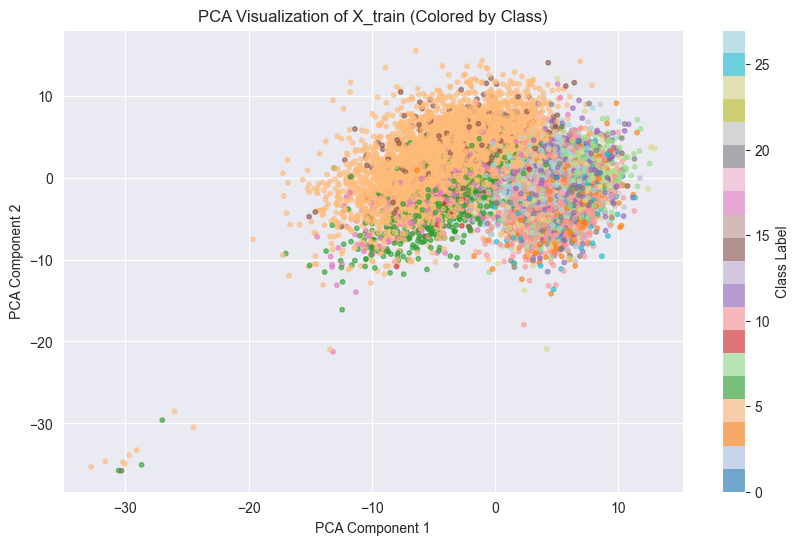

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 加载特征和标签
X_train = pd.read_csv("data/X_train.csv")
y_train = pd.read_csv("data/y_train.csv").squeeze()

# 使用 PCA 降维到二维
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_train)

# 可视化
plt.figure(figsize=(10, 6), facecolor='white')
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='tab20', s=10, alpha=0.6)
plt.title("PCA Visualization of X_train (Colored by Class)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label="Class Label")
plt.grid(True)
plt.show()


In [20]:
# 读取数据
X_train = pd.read_csv("data/X_train.csv")
y_train = pd.read_csv("data/y_train.csv").squeeze()

# 应用 SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 查看类别分布
print("原始类别分布：")
print(Counter(y_train))
print("\nSMOTE 后类别分布：")
print(Counter(y_resampled))

原始类别分布：
Counter({5: 4479, 10: 1081, 6: 553, 8: 516, 12: 457, 24: 385, 17: 354, 26: 278, 21: 269, 14: 264, 4: 238, 25: 184, 19: 177, 20: 153, 27: 107, 7: 103, 11: 78, 3: 65, 13: 62, 18: 60, 23: 41, 15: 26, 9: 25, 0: 18, 2: 7, 22: 7, 1: 7, 16: 6})

SMOTE 后类别分布：
Counter({10: 4479, 5: 4479, 4: 4479, 11: 4479, 26: 4479, 24: 4479, 12: 4479, 15: 4479, 13: 4479, 6: 4479, 8: 4479, 25: 4479, 7: 4479, 3: 4479, 17: 4479, 21: 4479, 20: 4479, 19: 4479, 23: 4479, 14: 4479, 18: 4479, 27: 4479, 16: 4479, 2: 4479, 22: 4479, 1: 4479, 9: 4479, 0: 4479})


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

In [23]:
# 6. 初始化并训练逻辑回归模型
model = LogisticRegression(
    multi_class='multinomial',  # Softmax 回归
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
model.fit(X_resampled, y_resampled)

# 7. 预测与评估
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred, digits=4))
print("Macro F1-score:", f1_score(y_val, y_pred, average='macro'))

/Users/houyijia/Desktop/COMP9021_23T3/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       895
           1     1.0000    1.0000    1.0000       896
           2     1.0000    1.0000    1.0000       896
           3     1.0000    1.0000    1.0000       896
           4     0.9933    0.9933    0.9933       896
           5     0.8570    0.7958    0.8252       896
           6     0.9967    1.0000    0.9983       896
           7     0.9989    1.0000    0.9994       896
           8     0.9721    0.9743    0.9732       895
           9     1.0000    1.0000    1.0000       895
          10     0.9794    0.9542    0.9666       896
          11     1.0000    1.0000    1.0000       896
          12     0.9742    0.9699    0.9720       896
          13     1.0000    1.0000    1.0000       896
          14     0.8265    0.8772    0.8511       896
          15     1.0000    1.0000    1.0000       896
          16     1.0000    1.0000    1.0000       896
          17     0.9944    